
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates. 
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [ ]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

Note that the 28x28 quickdraw images have already been "flattened" into 784: dimensional vectors

In [ ]:
# load the quickdraw data set
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks
data = np.load('/content/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

fatal: destination path 'DS-Unit-4-Sprint-2-Neural-Networks' already exists and is not an empty directory.
(100000, 784)
(100000,)


These are the names of the 10 image classes

In [ ]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

We can explore the data a bit by reshaping the vectors back to images and displaying them with their labels. <br>
Turns out the data has 10 blocks of 10,000 images of each of the above labels, in order. <br>
So the code below displays the first image of each class.

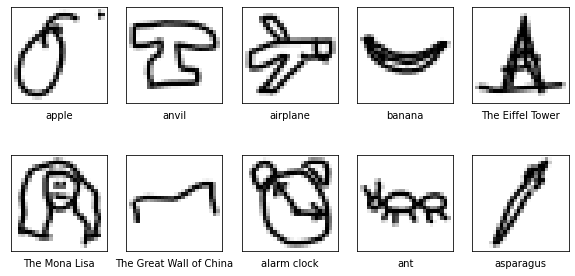

In [ ]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1) # num+1 specifies the position of the current subplot in the figure.
    plt.xticks([]) # remove the tick marks on both the x-axis 
    plt.yticks([]) # and y-axis of the plot.
    plt.grid(False) # remove the grid lines 
    plt.imshow(X[start].reshape(28,28),cmap=plt.cm.binary) # show img by getting the img data and reshaping it to a 28x28 pixel array, display img in black and white
    plt.xlabel(name) # add name of the class for each img
    start += 10000
plt.show()

Say hello to the Quickdraw dataset!

You'll be using this dataset a lot this week as an alternative to the MNIST digits data set, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [ ]:
# always a good idea to shuffle your dataset!
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`
 
Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

In [ ]:
X.shape

(100000, 784)

In [ ]:
# get dim of image row vectors and save to input_dim

# get number of unique labels and save to n_output_labels

# normalize image data to values between 0 and 1 (by dividing by max pixel value)


# YOUR CODE HERE
input_dim = 784
n_output_labels = len(np.unique(y))
epochs=20
# The maximum value that can be stored in 8 bits is  2^8 − 1 = 255
max_value=255
X_scaled = X.astype('float32') / max_value
# raise NotImplementedError()

In [ ]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [ ]:
# instantiate a sequential object and call it model, then add the layers to your model

# add a compile layer but don't fit your model yet 

# YOUR CODE HERE
model = Sequential()

# Hidden layer 1
model.add(Dense(500, activation='relu', input_dim=input_dim))
# Hidden layer 2
model.add(Dense(250, activation='relu'))
# Hidden layer 3
model.add(Dense(100, activation='relu'))
# Output layer
model.add(Dense(n_output_labels, activation='softmax')) # softmax values can be interpreted as the probability of each class given the input data

model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# raise NotImplementedError()

In [ ]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [ ]:
# check out your model summary 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 500)               392500    
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 100)               25100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit your model and save training results to history 
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 21s 8ms/step - loss: 0.9860 - accuracy: 0.7078 - val_loss: 0.7497 - val_accuracy: 0.7800
Epoch 2/20
2500/2500 [==============================] - 21s 9ms/step - loss: 0.6744 - accuracy: 0.8035 - val_loss: 0.6277 - val_accuracy: 0.8129
Epoch 3/20
2500/2500 [==============================] - 20s 8ms/step - loss: 0.5735 - accuracy: 0.8311 - val_loss: 0.5559 - val_accuracy: 0.8353
Epoch 4/20
2500/2500 [==============================] - 22s 9ms/step - loss: 0.5064 - accuracy: 0.8499 - val_loss: 0.5122 - val_accuracy: 0.8495
Epoch 5/20
2500/2500 [==============================] - 23s 9ms/step - loss: 0.4559 - accuracy: 0.8655 - val_loss: 0.4913 - val_accuracy: 0.8555
Epoch 6/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.4156 - accuracy: 0.8775 - val_loss: 0.4581 - val_accuracy: 0.8670
Epoch 7/20
2500/2500 [==============================] - 20s 8ms/step - loss: 0.3823 - accuracy: 0.8877 - val_loss: 0.4427 - val_a

----
### Visualize the Results

- Move results in `history` to a dataframe. 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of observations. 

At what point should we have stopped training the model and why? 

In [ ]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.985989,0.707825,0.749731,0.78000
1,0.674362,0.803525,0.627654,0.81290
2,0.573487,0.831075,0.555861,0.83530
3,0.506445,0.849875,0.512219,0.84950
4,0.455854,0.865488,0.491333,0.85550
5,0.415579,0.877500,0.458148,0.86700
6,0.382259,0.887725,0.442723,0.86920
7,0.352422,0.896250,0.436707,0.87365
8,0.325653,0.904737,0.431253,0.87360
9,0.301645,0.911775,0.429998,0.87665


In [ ]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

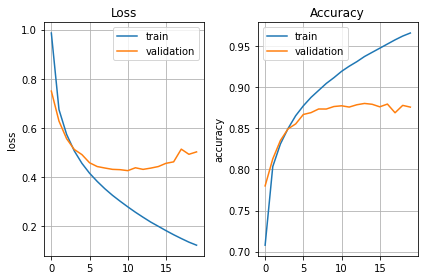

In [ ]:
# use seaborn to plot loss and accuracy metrics

# YOUR CODE HERE
plt.subplot(1, 2, 1)
epoch= [i for i in range(len(df['loss']))]
sns.lineplot(x=epoch, y=df['loss'], label='train')
sns.lineplot(x=epoch, y=df['val_loss'], label='validation')
plt.title('Loss')
plt.grid()

plt.subplot(1, 2, 2)
epoch= [i for i in range(len(df['accuracy']))]
sns.lineplot(x=epochs, y=df['accuracy'], label='train')
sns.lineplot(x=epochs, y=df['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.grid()

plt.tight_layout()

# raise NotImplementedError()

### Observations 

Based on the plot of the training and validation loss, answer the following questions. 

**Was our model able to learn throughout the 20 epochs? Why or why not?**

YOUR ANSWER HERE

It seems like the model was able to learn throughout the 20 epochs, as both training and validation accuracy increased, while the training and validation loss decreased overtime.

The training accuracy started at 70.78% and reached 96.62% by the end of the 20 epochs, while the validation accuracy started at 78% and reached 87.60%. Similarly, the training loss started at 98.60% and reached 12.27%, while the validation loss started at 74.97% and reached 50.23%.

These trends suggest that the model was improving and learning as it was trained over the 20 epochs.

**Is our model overfitting? Why or why not?**

YOUR ANSWER HERE

It seems like the model is overfitting, as the training accuracy is higher than the validation accuracy in a significant part of the epochs. The degree of overfitting is not severe because the difference between training and validation accuracy is not big. However, if we look at the curves in the plot, the validation accuracy starts to plateau while the training accuracy continues to increase. Additionally, we see that the validation loss begins to plateau and then increase while the training loss continues to decrease. Both of these situations are signs that the model has learned the noise in the training data and is fitting the data too closely, which causes it to not generalize as well on new or unseen data.

**Could the model score benefit from additional epochs? Why or why not?**

YOUR ANSWER HERE

Given that both the validation accuracy and validation loss have plateaued after a certain epoch, I don't think additional training would improve the model's ability to generalize to new or unseen data. In fact, continuing to train the model could result in overfitting to the training data and ultimately lead to worse performance on new data.

-----
## Change Optimizers

Let's compare model performance between different optimizers. 
- Build a new model, identical to the last one but using `adam` for the optimizer. 
- Train (fit) the model
- Save the modeling results to adam_history, so we don't erase the results from the previous model run
- Visualize the training results just as we did for the last model. 


In [ ]:
# train the same model as above but use the sgd optimizer if you used adam previously (or use adam if you used sgd previously)

# YOUR CODE HERE
model = Sequential()

# Hidden layer 1
model.add(Dense(500, activation='relu', input_dim=input_dim))
# Hidden layer 2
model.add(Dense(250, activation='relu'))
# Hidden layer 3
model.add(Dense(100, activation='relu'))
# Output layer
model.add(Dense(n_output_labels, activation='softmax')) # softmax values can be interpreted as the probability of each class given the input data

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit your model and save training results to adam_history 
adam_history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )


# raise NotImplementedError()

Epoch 1/20
2500/2500 [==============================] - 32s 12ms/step - loss: 0.5946 - accuracy: 0.8176 - val_loss: 0.4742 - val_accuracy: 0.8562
Epoch 2/20
2500/2500 [==============================] - 36s 14ms/step - loss: 0.4210 - accuracy: 0.8722 - val_loss: 0.4460 - val_accuracy: 0.8660
Epoch 3/20
2500/2500 [==============================] - 28s 11ms/step - loss: 0.3498 - accuracy: 0.8933 - val_loss: 0.4205 - val_accuracy: 0.8751
Epoch 4/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.2968 - accuracy: 0.9078 - val_loss: 0.4147 - val_accuracy: 0.8799
Epoch 5/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.2551 - accuracy: 0.9207 - val_loss: 0.4352 - val_accuracy: 0.8759
Epoch 6/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.2174 - accuracy: 0.9320 - val_loss: 0.4602 - val_accuracy: 0.8794
Epoch 7/20
2500/2500 [==============================] - 28s 11ms/step - loss: 0.1888 - accuracy: 0.9398 - val_loss: 0.4903 -

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 500)               392500    
                                                                 
 dense_28 (Dense)            (None, 250)               125250    
                                                                 
 dense_29 (Dense)            (None, 100)               25100     
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# YOUR CODE HERE

adam_df = pd.DataFrame(adam_history.history)
adam_df

# raise NotImplementedError()

,loss,accuracy,val_loss,val_accuracy
0,0.594564,0.817638,0.474247,0.85625
1,0.420957,0.872187,0.446005,0.86600
2,0.349789,0.893287,0.420462,0.87510
3,0.296834,0.907812,0.414673,0.87995
4,0.255129,0.920663,0.435152,0.87590
5,0.217373,0.931975,0.460168,0.87940
6,0.188798,0.939825,0.490280,0.87770
7,0.163677,0.947350,0.536996,0.87705
8,0.143804,0.953987,0.616123,0.87840
9,0.129925,0.957862,0.588060,0.87875


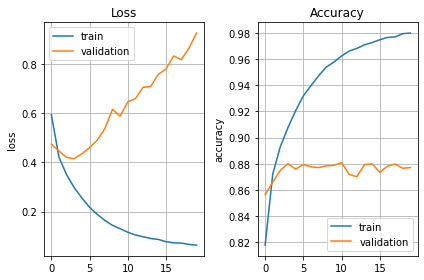

In [ ]:
# use seaborn to plot loss and accuracy metrics using Adam as the optimizer

# YOUR CODE HERE
plt.subplot(1, 2, 1)
epoch= [i for i in range(len(adam_df['loss']))]
sns.lineplot(x=epoch, y=adam_df['loss'], label='train')
sns.lineplot(x=epoch, y=adam_df['val_loss'], label='validation')
plt.title('Loss')
plt.grid()

plt.subplot(1, 2, 2)
epoch= [i for i in range(len(adam_df['accuracy']))]
sns.lineplot(x=epoch, y=adam_df['accuracy'], label='train')
sns.lineplot(x=epoch, y=adam_df['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.grid()

plt.tight_layout()

In [ ]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions. 

**Is our model overfitting? Why or why not?**

YOUR ANSWER HERE

The model's training and validation accuracy both improve over time, suggesting that it is learning and generalizing well to new data. Even though the gap between the two accuracies is relatively small, we could say the model is overfitting. If we look at the data or the plot, starting from the third epoch the model appears to be overfitting to the training data, as evidenced by the plateauing of the validation accuracy while the training accuracy continues to improve. 

Furthermore, when we examine the loss, we see that it decreases over time in the training set, but increases significantly for the validation set. This indicates that the model may not be able to generalize well to new data.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

YOUR ANSWER HERE

Since the model is already overfitting, increasing the number of epochs may only exacerbate the problem and cause the validation accuracy to decrease.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

YOUR ANSWER HERE

To help prevent or mitigate overfitting in the model we could use the early stopping technique, which consists in monitoring the validation loss during training, and stopping training when the validation loss stops improving or starts to increase. 